In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Elevate Labs/titanic_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,False,True
2,1,1,1,0.433312,0.432793,-0.473674,0.420730,False,True
3,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,False,True
4,0,3,0,-0.104637,-0.474545,-0.473674,-0.478116,True,False


### **Summary Statistics**

In [16]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000
mean,0.299827,2.502600,0.247834,-0.004480,-0.293706,-4.736736e-01,-0.347884
std,0.458579,0.733909,0.432129,0.657194,0.403796,2.777966e-16,0.253828
min,0.000000,1.000000,0.000000,-1.872184,-0.474545,-4.736736e-01,-0.648422
25%,0.000000,2.000000,0.000000,-0.412037,-0.474545,-4.736736e-01,-0.491874
50%,0.000000,3.000000,0.000000,-0.104637,-0.474545,-4.736736e-01,-0.474005
75%,1.000000,3.000000,0.000000,0.241187,-0.474545,-4.736736e-01,-0.329287
max,1.000000,3.000000,1.000000,1.893459,1.340132,-4.736736e-01,0.583318


### **Histograms & Boxplots**

In [4]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

**Histograms**

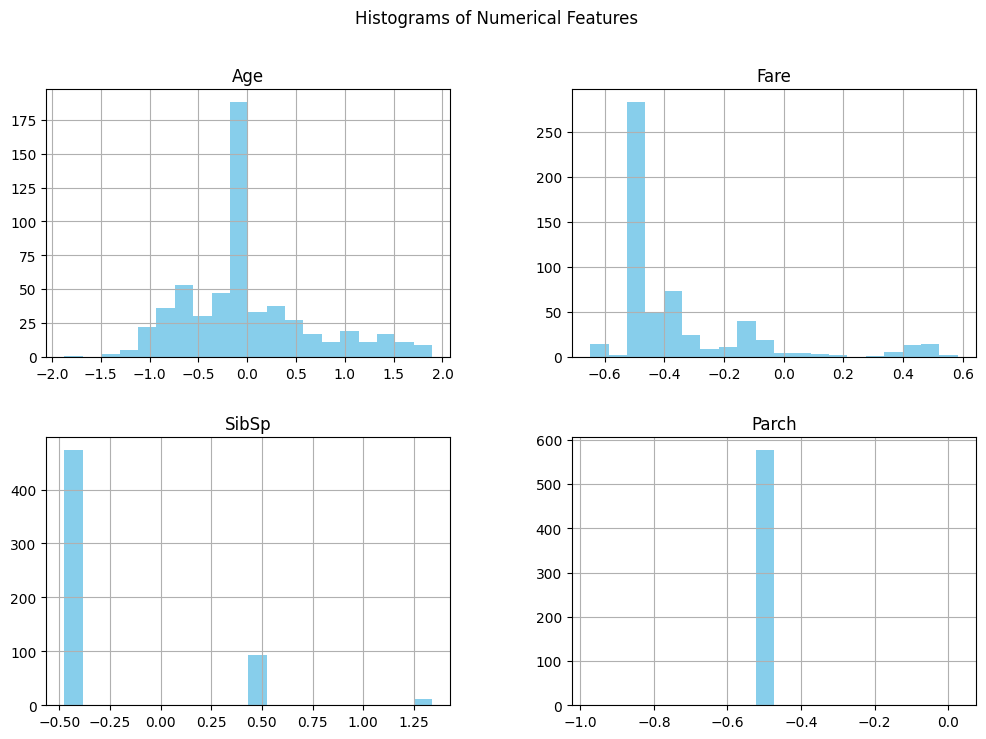

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Boxplots**

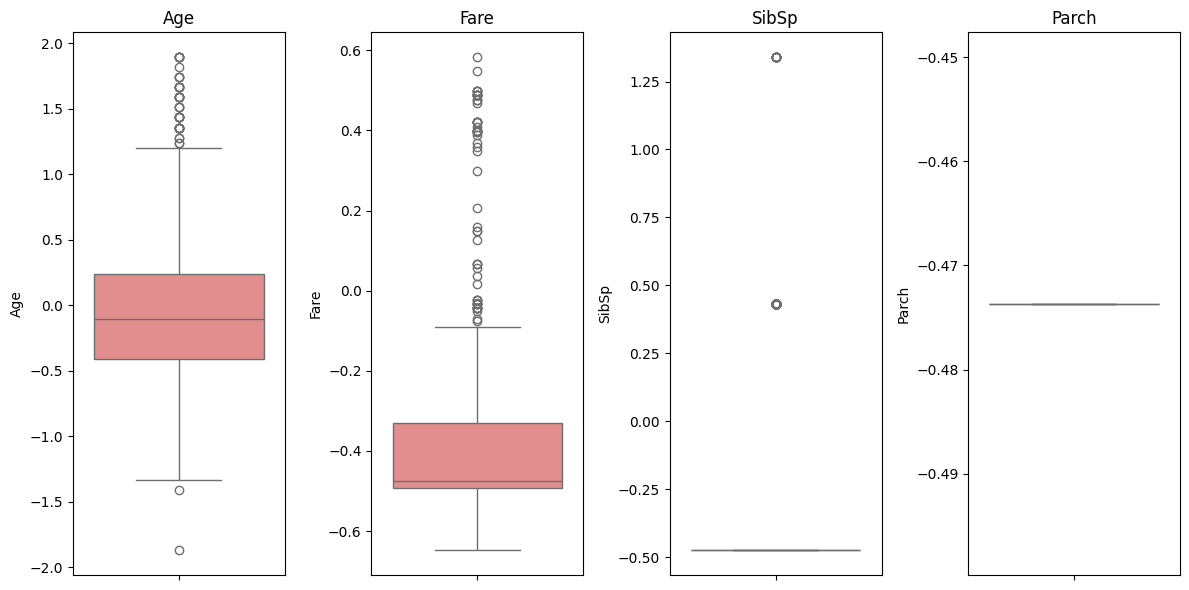

In [6]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()

### **Correlation Matrix & Pairplot**

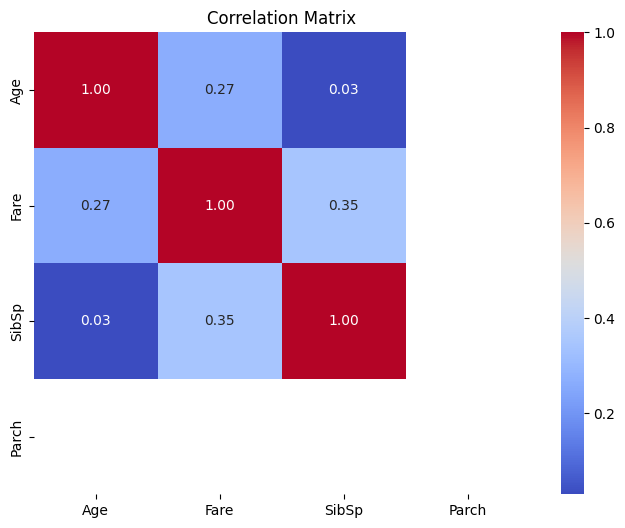

In [7]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

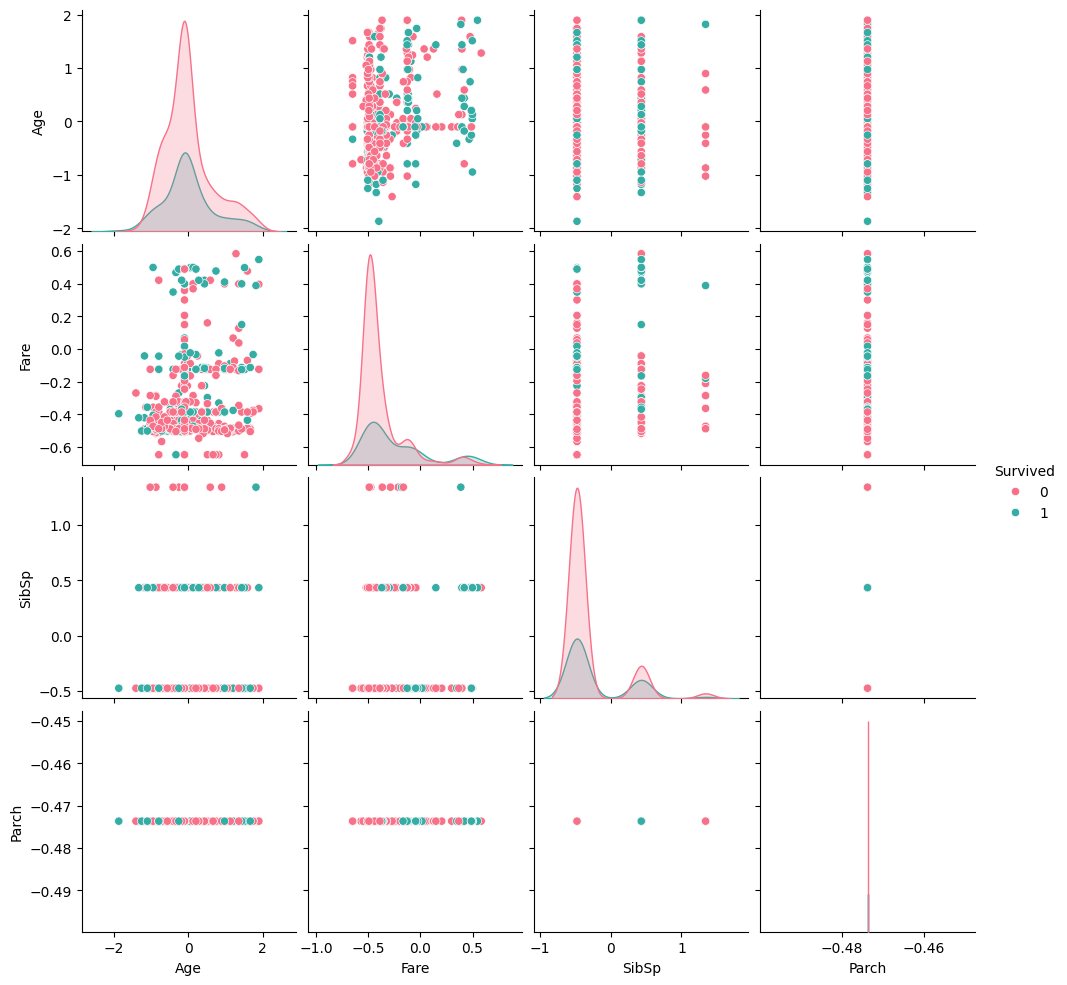

In [8]:
sns.pairplot(df[num_cols + ['Survived']], hue='Survived', palette='husl')

### **Patterns & Trends**

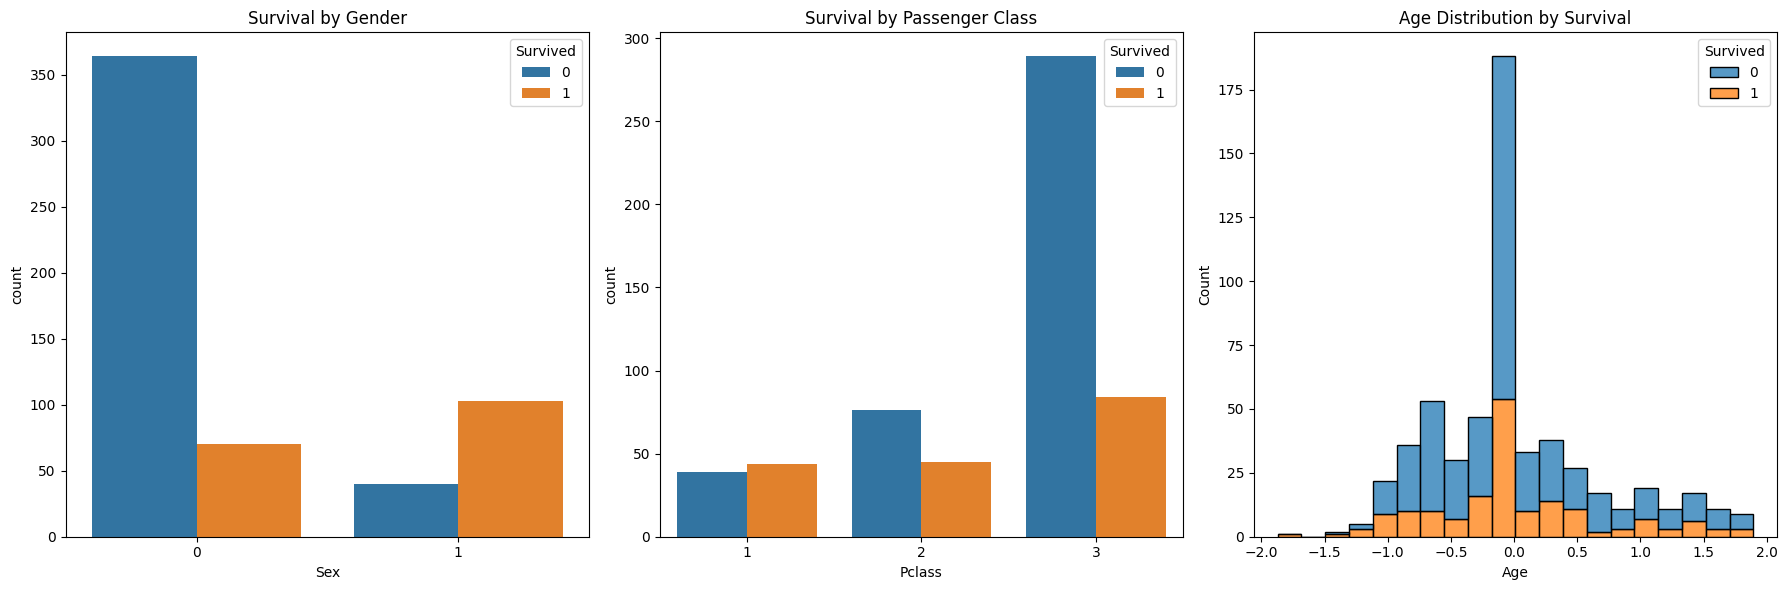

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival by Gender')

# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival by Passenger Class')

# Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20, ax=axes[2])
axes[2].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

### **Visual Explorations**

**Histograms (for distribution)**

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

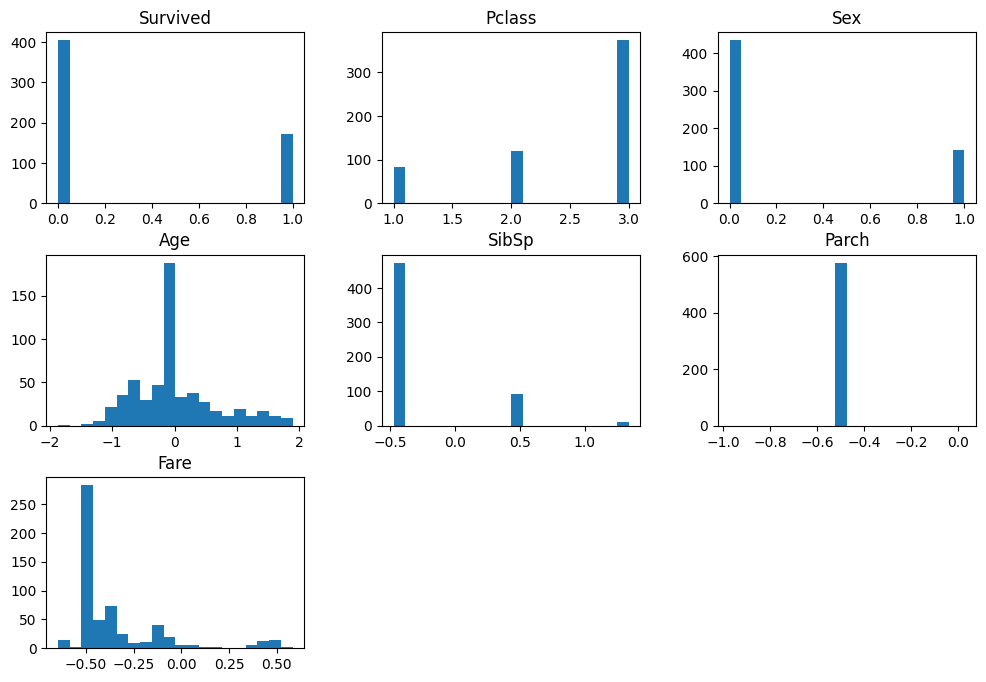

In [11]:
df.hist(bins=20, figsize=(12, 8), grid=False)

**Boxplots (for outliers and distributions)**

Text(0.5, 1.0, 'Age vs Survival')

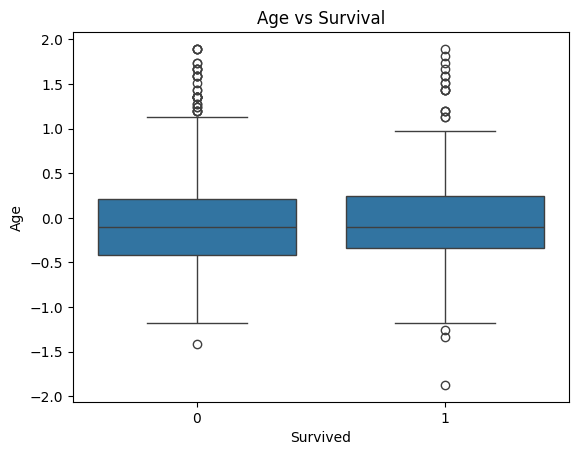

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

**Pairplot (for correlation between features)**

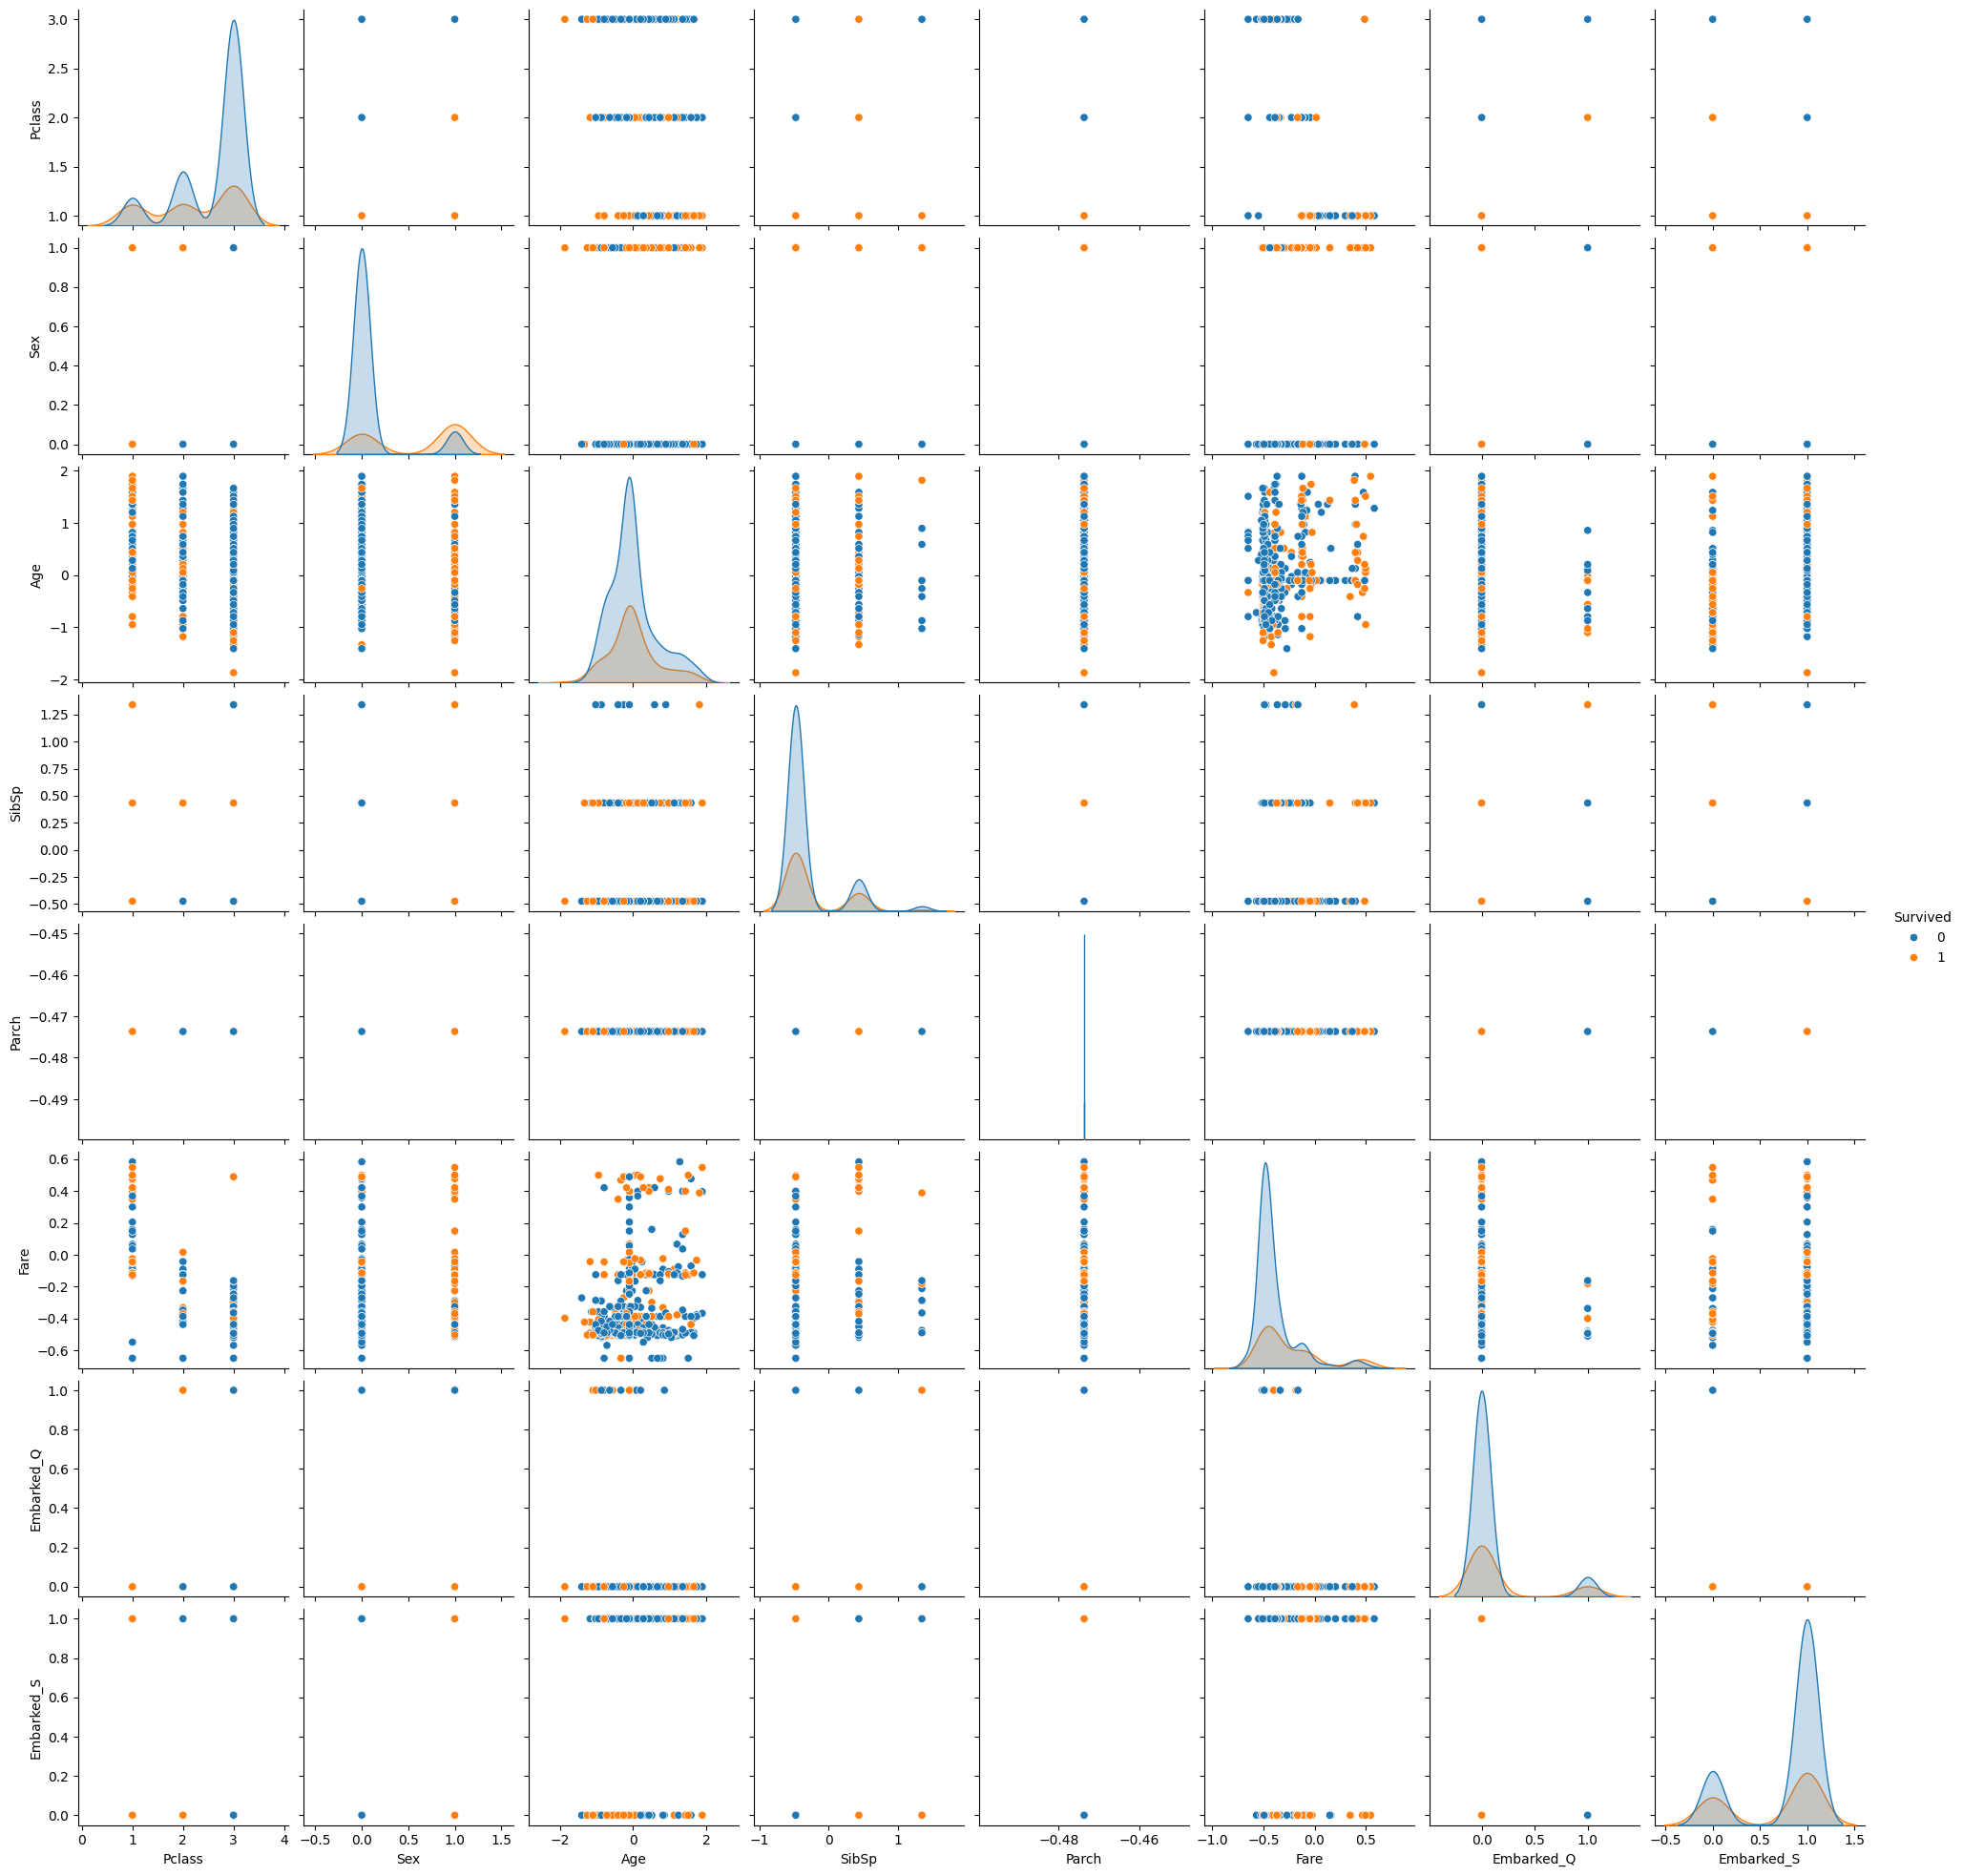

In [13]:
sns.pairplot(df, hue='Survived')

**Correlation Heatmap (to check linear relationships)**

<Axes: >

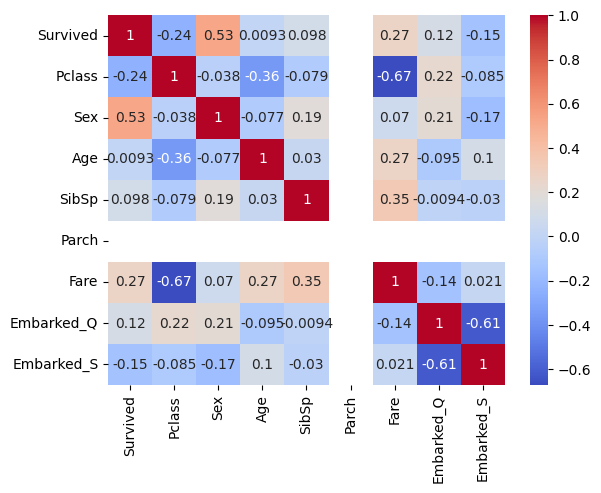

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Barplots for Categorical Features**

<Axes: xlabel='Pclass', ylabel='count'>

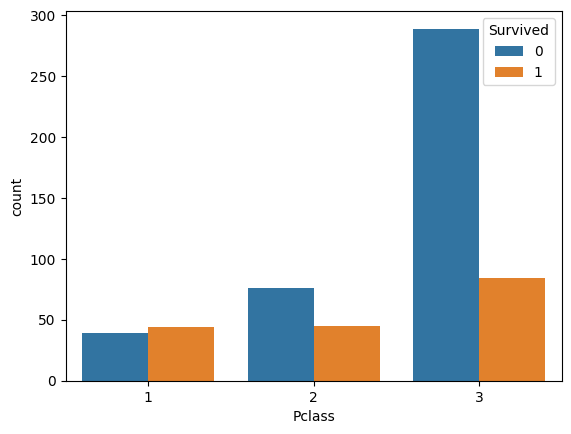

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df)

### **Feature-level inferences from visuals**




---


1.   Sex vs Survival:

*   From the barplot, it's clear that females had a much higher survival rate than males.
*   This confirms historical patterns and supports the idea that Sex is a strong predictive feature


---



2.   Pclass vs Survival:

*   The barplot shows 1st class passengers had the highest survival rate, followed by 2nd, with 3rd class having the lowest.
*   Pclass is an important socio-economic feature, and it strongly correlates with survival.


---



3.   Age Distribution by Survival:

*   The boxplot and histogram indicate that younger passengers (especially children) had a slightly better chance of survival.
*   However, survivors had a wide age spread, meaning Age is important but less deterministic alone.


---


4.   Fare Distribution:

*   Survivors generally paid higher fares (visible from the boxplot and histogram).
*   This connects with Pclass, where higher fare often implies higher class, hence better survival odds.


---


5.   SibSp & Parch:

*   Histograms and pairplots suggest most passengers had few or no family members aboard.
*   A slight trend shows that passengers with small families (1–2 members) had better survival than those alone or in large groups.


---



6.   Embarked Ports:

*   From barplots and encoded columns, passengers from Cherbourg (inferred from absence) had higher survival.
*   Southampton had the most passengers but lower survival, while Queenstown was in between.



---



7.   Correlation Matrix:

*   Sex, Pclass, and Fare show notable correlations with Survived.
*   Pclass and Fare are negatively correlated, suggesting higher class → higher fare → better survival.


---



### **Drop unnecessary columns**

Based on the analysis, dropping the Parch column seems like a good idea...

1. Lack of Variability: From the EDA, we observed that the Parch column has no variation (the standard deviation is almost 0). This suggests that the values in this column are constant or nearly constant across all passengers.

2. No Contribution to Model: Since Parch doesn’t add useful variance, it won’t contribute meaningful information for machine learning models. It might introduce noise, making the model unnecessarily complex without improving performance.



In [18]:
# Dropping the 'Parch' column
df_cleaned = df.drop('Parch', axis=1)

# Check the updated DataFrame
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.502445,False,True
1,1,3,1,-0.258337,-0.474545,-0.488854,False,True
2,1,1,1,0.433312,0.432793,0.420730,False,True
3,0,3,0,0.433312,-0.474545,-0.486337,False,True
4,0,3,0,-0.104637,-0.474545,-0.478116,True,False


In [19]:
# Saving the updated dataset
df_cleaned.to_csv('/content/drive/MyDrive/Elevate Labs/titanic_cleaned_1.csv', index=False)

# Confirmation
print("Dataset saved as 'titanic_cleaned_1.csv'.")

Dataset saved as 'titanic_cleaned_1.csv'.
